<a href="https://colab.research.google.com/github/azraar/frist/blob/master/pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms,datasets

Above, we're just loading in the dataset, shuffling it, and applying any transforms/pre-processing to it.

Next, we need to handle for how we're going to iterate over that dataset:

In [7]:

train = datasets.MNIST('',train=True, download=True,
                   transform=transforms.Compose([transforms.ToTensor()]))
  
test =  datasets.MNIST('',train=False, download=True,
                   transform = transforms.Compose([transforms.ToTensor()]))

0it [00:00, ?it/s]

9920512it [00:01, 9321950.16it/s]                            


Extracting MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 142425.26it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2328205.56it/s]                            
0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 51783.87it/s]            


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10,shuffle=False)

You'll see later why this torchvision stuff is basically cheating! For now though, what have we done? Well, quite a bit.

Training and Testing data split
To train any machine learning model, we want to first off have training and validation datasets. This is so we can use data that the machine has never seen before to "test" the machine.

Shuffling
Then, within our training dataset, we generally want to randomly shuffle the input data as much as possible to hopefully not have any patterns in the data that might throw the machine off.

For example, if you fed the machine a bunch of images of zeros, the machine would learn to classify everything as zero. Then you'd start feeding it ones, and the machine would figure out pretty quick to classify everything as ones...and so on. Whenever you stop, the machine would probably just classify everything as the last thing you trained on. If you shuffle the data, your machine is much more likely to figure out what's what.

Scaling and normalization
Another consideration at some point in the pipeline is usually scaling/normalization of the dataset. In general, we want all input data to be between zero and one. Often many datasets will contain data in ranges that are not within this range, and we generally will want to come up with a way to scale the data to be within this range.

For example, an image is comprised of pixel values, most often in the range of 0 to 255. To scale image data, you usually just divide by 255. That's it. Even though all features are just pixels, and all you do is divide by 255 before passing to the neural network, this makes a huge difference.

Batches
Once you've done all this, you then want to pass your training dataset to your neural network.

Not so fast!

There are two major reasons why you can't just go and pass your entire dataset at once to your neural network:

Neural networks shine and outperform other machine learning techniques because of how well they work on big datasets. Gigabytes. Terabytes. Petabytes! When we're just learning, we tend to play with datasets smaller than a gigabyte, and we can often just toss the entire thing into the VRAM of our GPU or even more likely into RAM.
Unfortunately, in practice, you would likely not get away with this.

The aim with neural networks is to have the network generalize with the data. We want the neural network to actually learn general principles. That said, neural networks often have millions, or tens of millions, of parameters that they can tweak to do this. This means neural networks can also just memorize things. While we hope neural networks will generalize, they often learn to just memorize the input data. Our job as the scientist is to make it as hard as possible for the neural network to just memorize.
This is another reason why we often track "in sample" validation acccuracy and "out of sample" validation accuracy. If these two numbers are similar, this is good. As they start to diverge (in sample usually goes up considerably while out of sample stays the same or drops), this usually means your neural network is starting to just memorize things.

One way we can help the neural network to not memorize is, at any given time, we feed only some specific batch size of data. This is often something between 8 and 64.

Although there is no actual reason for it, it's a common trend in neural networks to use base 8 numbers for things like neuron counts, batch sizes...etc.

This batching helps because, with each batch, the neural network does a back propagation for new, updated weights with hopes of decreasing that loss.

With one giant passing of your data, this would include neuron changes that had nothing to do with general principles and were just brute forcing the operation.

By passing many batches, each with their own gradient calcs, loss, and backprop, this means each time the neural network optimizes things, it will sort of "keep" the changes that were actually useful, and erode the ones that were just basically memorizing the input data.

Given a large enough neural network, however, even with batches, your network can still just simply memorize.

This is also why we often try to make the smallest neural network as possible, so long as it still appears to be learning. In general, this will be a more successful model long term.

Now what?

Well, we have our data, but what is it really? How do we work with it? We can iterate over our data like so:

In [10]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Each iteration will contain a batch of 10 elements (that was the batch size we chose), and 10 classes. Let's just look at one:

In [11]:
x, y = data[0][0],data[1][0]
print(y)

tensor(5)


X is our input data. The features. The thing we want to predict. y is our label. The classification. The thing we hope the neural network can learn to predict. We can see this by doing.

data[0] is a bunch of features for things and data[1] is all the targets. So:

tensor([5, 3, 8, 3, 4, 1, 9, 7, 0, 1])
As you can see, data[1] is just a bunch of labels. So, since data[1][0] is a 5, we can expect data[0][0] to be an image of a 5. Let's see!

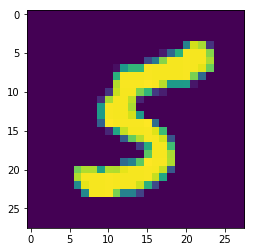

In [19]:
import matplotlib.pyplot as plt 

plt.imshow(data[0][0].view(28,28))
plt.show()



Clearly a 5 indeed.

So, for our checklist:

We've got our data of various featuresets and their respective classes.
That data is all numerical.
We've shuffled the data.
We've split the data into training and testing groups.
Is the data scaled?
Is the data balanced?

In [15]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


What is data balancing?

Recall before how I explained that if we don't shuffle our data, the machine will learn things like what the last few hundred classes were in a row, and probably just predict that from there on out.

Well, with data balancing, a similar thing could occur.

Imagine you have a dataset of cats and dogs. 7200 images are dogs, and 1800 are cats. This is quite the imbalance. The classifier is highly likely to find out that it can very quickly and easily get to a 72% accuracy by simple always predicting dog. It is highly unlikely that the model will recover from something like this.

Other times, the imbalance isn't quite as severe, but still enough to make the model almost always predict a certain way except in the most obvious-to-it-of cases. Anyway, it's best if we can balance the dataset.

By "balance," I mean make sure there are the same number of examples for each classifications in training.

Sometimes, this simply isn't possible. There are ways for us to handle for this with special class weighting for the optimizer to take note of, but, even this doesn't always work. Personally, I've never had success with this in any real world application.

In our case, how might we confirm the balance of data? Well, we just need to iterate over everything and make a count. Pretty simple:

In [26]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [28]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%") 

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


I am sure there's a better way to do this, and there might be a built-in way to do it with torchvision. Anyway, as you can see, the lowest percentage is 9% and the highest is just over 11%. This should be just fine. We could balance this perfectly, but there's likely no need for that.